<a href="https://colab.research.google.com/github/LuizPH0/An-lise_Vendas_no_Varejo/blob/main/Projeto_An%C3%A1lise_de_Vendas_no_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Vendas no Varejo

#0. Introdução

No ambiente competitivo do varejo, compreender padrões de vendas e o comportamento dos consumidores é fundamental para tomar decisões estratégicas. Este projeto de análise de dados tem como objetivo explorar informações de vendas de um supermercado para identificar tendências, oportunidades de crescimento e possíveis áreas de melhoria.

Utilizando o Supermarket Sales Dataset (https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales), será possível analisar aspectos como desempenho de categorias de produtos, horários de maior movimento, preferências de métodos de pagamento e comportamento dos clientes por gênero. Além disso, serão aplicadas técnicas de visualização e análise descritiva para responder a questões importantes, como quais fatores contribuem para a receita total e como as vendas variam entre diferentes cidades.

Os insights obtidos podem ser aplicados para:

Otimizar estoques.
Planejar campanhas promocionais em horários estratégicos.
Melhorar a experiência do cliente.

#1. Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Carregando Dataset

In [2]:
mkt = pd.read_csv('SuperMarket Analysis.csv')

mkt.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#Reescrever Colunas
mkt = mkt.rename(columns={'Product line': 'ProductLine', 'Customer type': 'CustomerType', 'Tax 5%': 'Tax', 'Unit price': 'UnitPrice', 'gross income': 'GrossIncome', 'gross margin percentage': 'GrossMarginPercentage'})
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Invoice ID             1000 non-null   object 
 1   Branch                 1000 non-null   object 
 2   City                   1000 non-null   object 
 3   CustomerType           1000 non-null   object 
 4   Gender                 1000 non-null   object 
 5   ProductLine            1000 non-null   object 
 6   UnitPrice              1000 non-null   float64
 7   Quantity               1000 non-null   int64  
 8   Tax                    1000 non-null   float64
 9   Sales                  1000 non-null   float64
 10  Date                   1000 non-null   object 
 11  Time                   1000 non-null   object 
 12  Payment                1000 non-null   object 
 13  cogs                   1000 non-null   float64
 14  GrossMarginPercentage  1000 non-null   float64
 15  Gross

#3. Análise Univariada

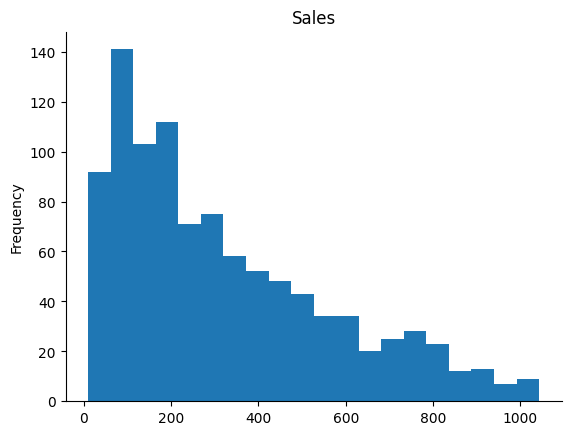

In [ ]:
mkt['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

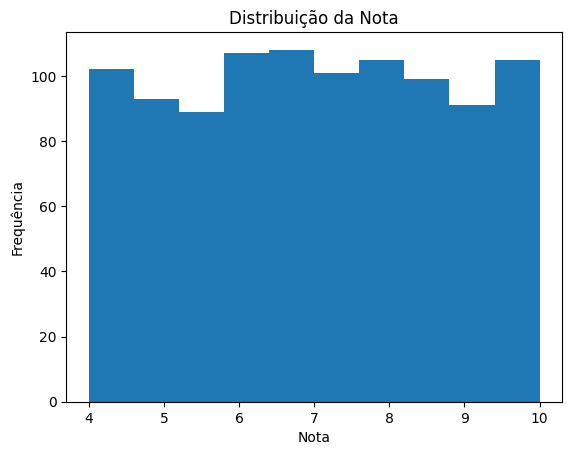

In [ ]:
_ = plt.hist(mkt.Rating)
_ = plt.title('Distribuição da Nota')
_ = plt.xlabel('Nota')
_ = plt.ylabel('Frequência')

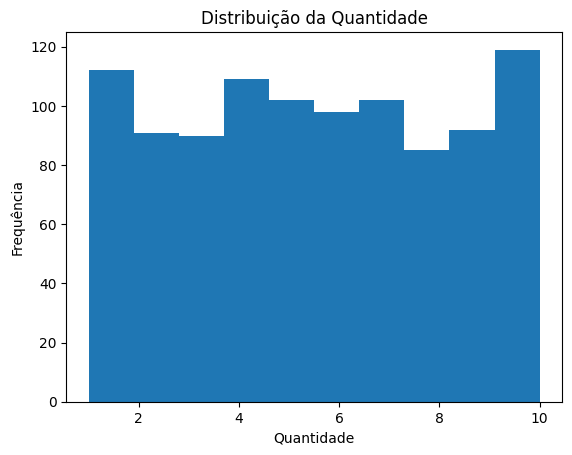

In [ ]:
_ = plt.hist(mkt.Quantity)
_ = plt.title('Distribuição da Quantidade')
_ = plt.xlabel('Quantidade')
_ = plt.ylabel('Frequência')

In [ ]:
mkt.Gender.value_counts()

,count
Gender,
Female,571
Male,429


In [ ]:
mkt.City.value_counts()


,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [ ]:
print(mkt['ProductLine'].value_counts());

ProductLine
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


#4. Análise Multivariada

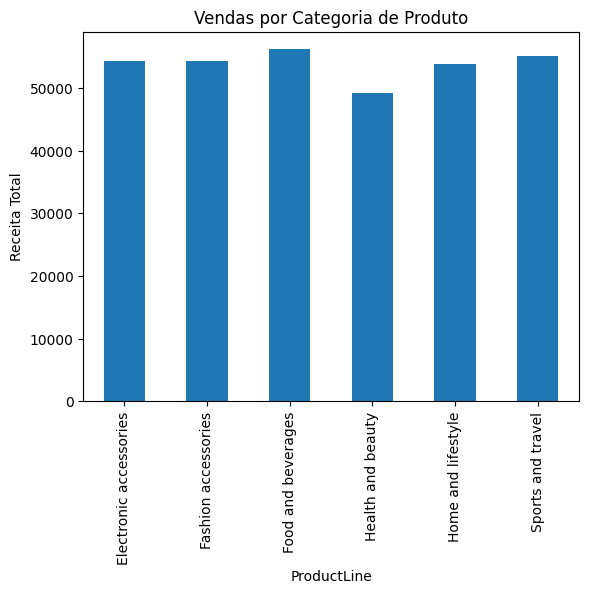

In [6]:
sales_by_product_line = mkt.groupby('ProductLine')['Sales'].sum()
sales_by_product_line.plot(kind='bar', title='Vendas por Categoria de Produto')
plt.ylabel('Receita Total')
plt.show()

In [7]:
print(sales_by_product_line)

ProductLine
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Sales, dtype: float64


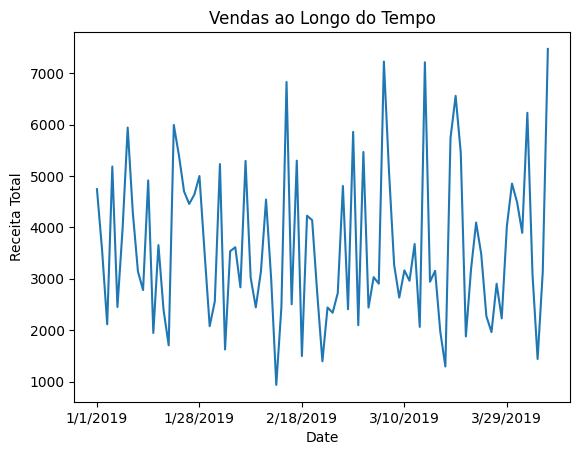

In [ ]:
sales_by_date = mkt.groupby('Date')['Sales'].sum()
sales_by_date.plot(title='Vendas ao Longo do Tempo')
plt.ylabel('Receita Total')
plt.show()


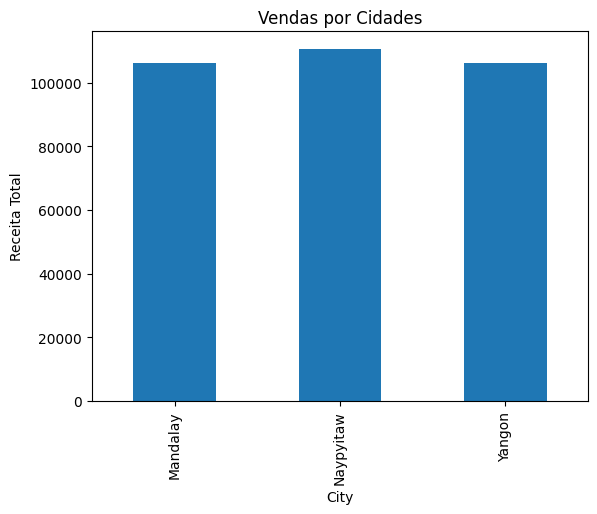

In [ ]:
sales_by_city = mkt.groupby('City')['Sales'].sum()
sales_by_city.plot(kind = 'bar',title='Vendas por Cidades')
plt.ylabel('Receita Total')
plt.show()

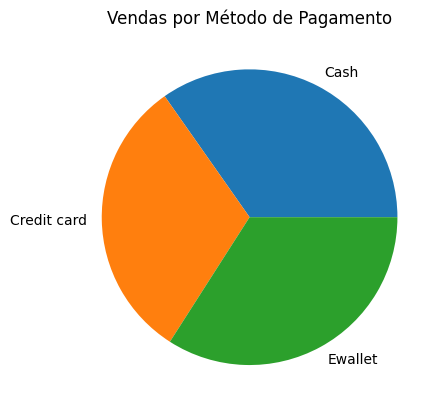

In [ ]:
sales_payment_method = mkt.groupby('Payment')['Sales'].sum()
sales_payment_method.plot(kind="pie",title='Vendas por Método de Pagamento')
plt.ylabel('')
plt.show()


In [ ]:
 print(mkt['Payment'].value_counts());

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


#Respondendo algumas perguntas
Qual categoria de produto gera mais receita?

Comida e bebida

Existem picos ou tendências em vendas ao longo do tempo?

Sim, existem o pico de vendas entre feveiro e março.

Quais métodos de pagamento são preferidos?

Seguindo a ordem do mais utilizado pro menos utilizado, seria:
1. Ewallet
2. Dinheiro
3. Cartão de crédito

Como as vendas variam entre cidades?

Naypyitaw tem mais vendas, logo em seguida vem Mandalay e por último Yangon